## Importing the dataset ##

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("D:/Datasets/titanc.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding the Structure of data ##

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Cleaning ##

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [11]:
df=df.dropna(subset=['Embarked'])

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Feature Engineering ###

In [14]:
df['familySize'] = df['SibSp']+df['Parch']+1

In [15]:
df['Sex']=df['Sex'].apply(lambda sex:1 if sex=='male' else 0 )

In [16]:
df['Embarked']=df['Embarked'].apply(lambda embarked:1 if embarked=='S' else (2 if embarked=='C' else 3 ))

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,1,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,2,1


## Exploatory Data Analysis (EDA) ##

In [19]:
df['PassengerId'].value_counts().sum()

889

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681,1.362205,1.906637
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.636157,1.614703
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,11.000000


In [21]:
df['Fare'].mean()

32.09668087739032

In [22]:
df['Age'].mean()

29.65344637067425

In [23]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.4151
1    28.4236
Name: Age, dtype: float64

In [24]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


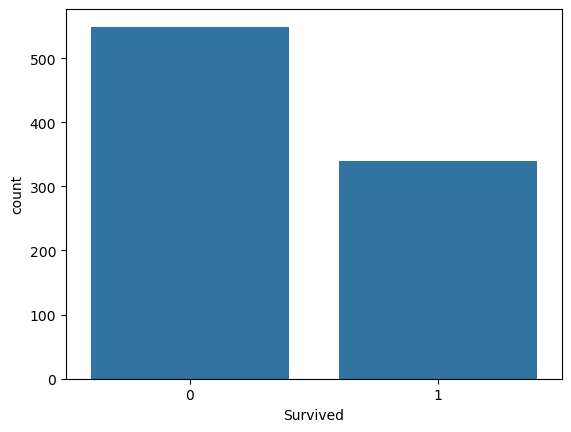

In [26]:
sns.countplot(data=df,x=df['Survived'])
plt.show()

In [27]:
df.select_dtypes(include=['number']).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703,-0.030555,-0.040258
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,0.108669,0.018277
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.043835,0.064221
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,-0.118593,-0.203191
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,0.009499,-0.247546
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,-0.060606,0.890654
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,-0.079320,0.782988
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,0.063462,0.218658
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000,-0.081057
familySize,-0.040258,0.018277,0.064221,-0.203191,-0.247546,0.890654,0.782988,0.218658,-0.081057,1.000000


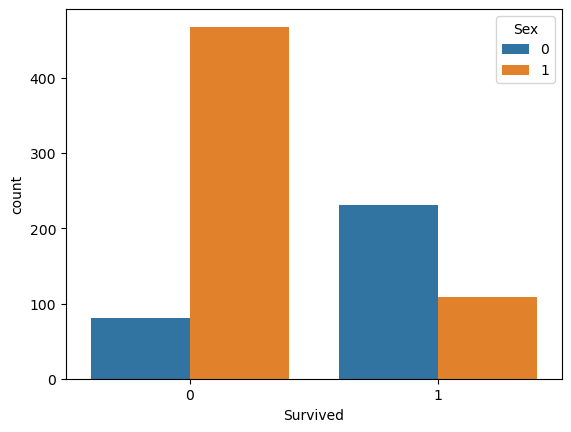

In [28]:
sns.countplot(data=df,x='Survived',hue='Sex')
plt.show()

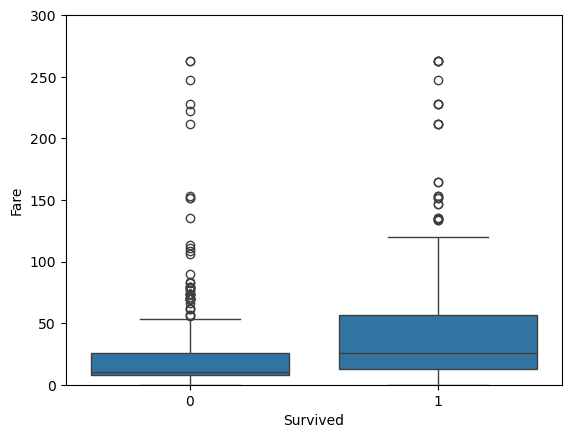

In [29]:
sns.boxplot(data=df, x='Survived', y = 'Fare')
plt.ylim(0,300)
plt.show()

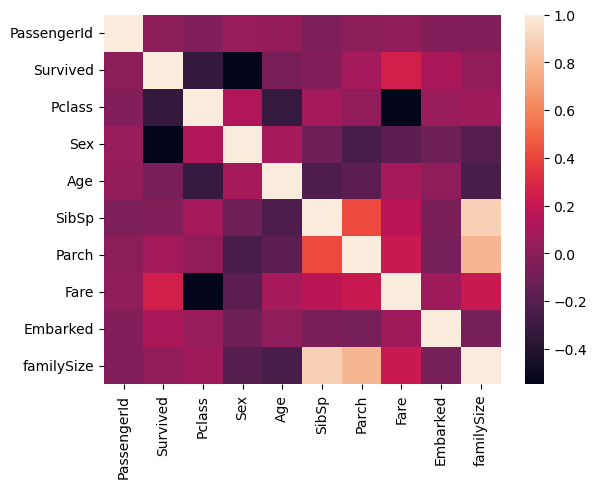

In [30]:
sns.heatmap(df.select_dtypes(include=['number']).corr())
plt.show()

## Modeling and Predection ##

### LogisticRegression ###

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=df.drop(['Survived','Name','Cabin','Ticket'],axis=1)
y=df['Survived']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler= StandardScaler()

In [45]:
x_train.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
familySize       int64
dtype: object

In [47]:
x_train.shape

(711, 9)

In [49]:
x_train_scaled = scaler.fit_transform(x_train)  # Apply fit and transform on training data
x_test_scaled = scaler.transform(x_test) 

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
lg=LogisticRegression()

In [55]:
lg.fit(x_train_scaled,y_train)

LogisticRegression()

In [57]:
y_pred=lg.predict(x_train_scaled)

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
accuracy=accuracy_score(y_train,y_pred)
conf=confusion_matrix(y_train,y_pred)
cls=classification_report(y_train,y_pred)

In [63]:
print(f'the model accuracy is {accuracy} \n the confusion matrix \n{conf} \n the classification report \n{cls}')

the model accuracy is 0.8002812939521801 
 the confusion matrix 
[[376  64]
 [ 78 193]] 
 the classification report 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       440
           1       0.75      0.71      0.73       271

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.79       711
weighted avg       0.80      0.80      0.80       711



In [65]:
y_pred_test=lg.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred_test)
conf=confusion_matrix(y_test,y_pred_test)
cls=classification_report(y_test,y_pred_test)
print(f'the model accuracy is {accuracy} \n the confusion matrix \n{conf} \n the classification report \n{cls}')

the model accuracy is 0.7865168539325843 
 the confusion matrix 
[[87 22]
 [16 53]] 
 the classification report 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



### Support Vector Machine (SVM) ###

In [68]:
from sklearn.svm import SVC

In [70]:
svm=SVC()

In [72]:
svm.fit(x_train_scaled,y_train)

SVC()

In [74]:
y_pred=svm.predict(x_train_scaled)

In [76]:
accuracy=accuracy_score(y_train,y_pred)
conf=confusion_matrix(y_train,y_pred)
cls=classification_report(y_train,y_pred)
print(f'the model accuracy is {accuracy} \n the confusion matrix \n{conf} \n the classification report \n{cls}')

the model accuracy is 0.8438818565400844 
 the confusion matrix 
[[406  34]
 [ 77 194]] 
 the classification report 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       440
           1       0.85      0.72      0.78       271

    accuracy                           0.84       711
   macro avg       0.85      0.82      0.83       711
weighted avg       0.84      0.84      0.84       711



In [78]:
y_pred_test=svm.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred_test)
conf=confusion_matrix(y_test,y_pred_test)
cls=classification_report(y_test,y_pred_test)
print(f'the model accuracy is {accuracy} \n the confusion matrix \n{conf} \n the classification report \n{cls}')

the model accuracy is 0.8202247191011236 
 the confusion matrix 
[[93 16]
 [16 53]] 
 the classification report 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.77      0.77      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

